**Importing and scaling the data**

- The training data is imported and scaled. 

- Scaling takes place to ensure that all values of the data fall within the same range, allowing the model to place equal weight on each feature. 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Load training data
df = pd.read_csv('/workspaces/First-data-project/Kaggle Project/Data/Cleaned Data/train_set.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

# Separate features and target
X = df.drop('price', axis=1)
y = df[['price']]  # Keep as DataFrame for scaler compatibility

# Scale features and target separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

X_scaled = pd.DataFrame(feature_scaler.fit_transform(X), columns=X.columns)
y_scaled = pd.DataFrame(target_scaler.fit_transform(y), columns=['price'])

**Linear Regressor with cross validation**

- Creating a linnear regression model that is trained and tested using cross validation

- Cross validation is a technique used to aid in reducing overfitting, as 'folds' of the data will be used to train and test themodel ensuring that the model adapts to differtent data sets

In [ ]:
X_cv = X_scaled
y_cv = y_scaled.values.ravel()  

regressor = LinearRegression()
regressor.fit(X_cv, y_cv)

cv_score = np.mean(cross_val_score(regressor, X_cv, y_cv, cv=5, scoring='neg_mean_squared_error'))
print("Mean CV MSE (scaled):", -cv_score)

Mean CV MSE (scaled): 0.016043489321988978


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': np.logspace(-3, 3, 20)} 

ridge = Ridge()

grid_ridge = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_cv, y_cv)

print("Best Ridge alpha:", grid_ridge.best_params_['alpha'])
print("Best Ridge CV MSE (scaled):", -grid_ridge.best_score_)


Best Ridge alpha: 0.6951927961775606
Best Ridge CV MSE (scaled): 0.016043445758821474


In [34]:
from sklearn.linear_model import Lasso

lasso_params = {'alpha': np.logspace(-3, 1, 20)}

lasso = Lasso(max_iter=10000)

grid_lasso = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X_cv, y_cv)

print("Best Lasso alpha:", grid_lasso.best_params_['alpha'])
print("Best Lasso CV MSE (scaled):", -grid_lasso.best_score_)


Best Lasso alpha: 0.001
Best Lasso CV MSE (scaled): 0.016218087741542275


In [ ]:
df_val = pd.read_csv('/workspaces/First-data-project/Kaggle Project/Data/Cleaned Data/val_set.csv')
df_val.drop('Unnamed: 0', axis=1, inplace=True)

X_val = df_val.drop('price', axis=1)
y_val_actual = df_val[['price']]  

X_val_scaled = pd.DataFrame(feature_scaler.transform(X_val), columns=X_val.columns)

best_ridge = grid_ridge.best_estimator_

y_pred_scaled = best_ridge.predict(X_val_scaled)

y_pred_unscaled = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_val_unscaled = y_val_actual.values  

rmse_unscaled = np.sqrt(mean_squared_error(y_val_unscaled, y_pred_unscaled))
print("Validation RMSE (real-world):", rmse_unscaled)


Validation RMSE (real-world): 114945.08688682056


In [39]:
print("y_true (actual prices):", y_true[:5])
print("y_pred (predicted prices):", y_pred[:5])


y_true (actual prices): [705000. 212644. 550000. 485000. 672000.]
y_pred (predicted prices): [464571.64933016 148985.0250501  443941.89819339 498899.87275414
 618434.0840727 ]


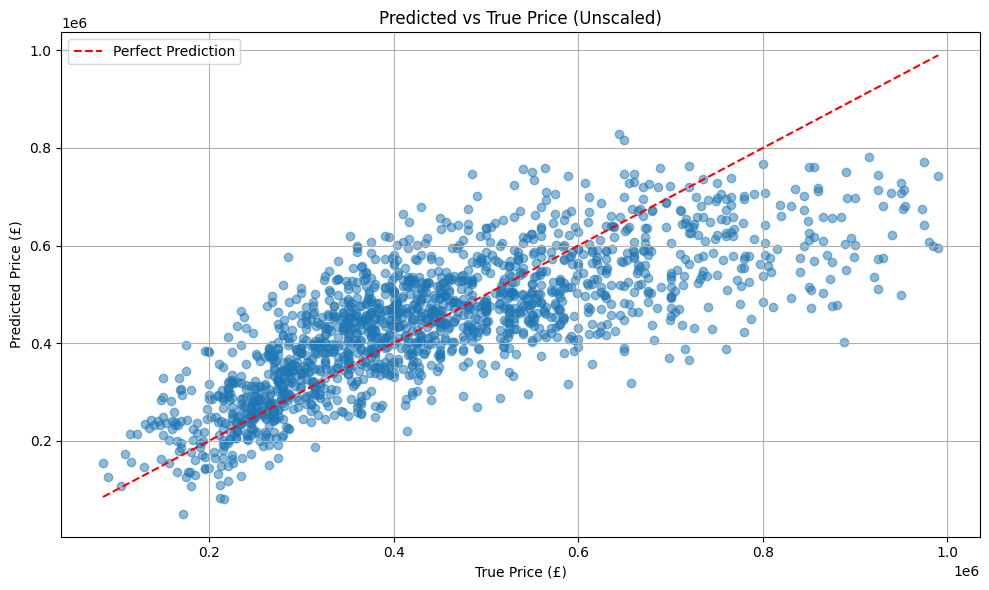

In [ ]:
y_true = y_val_unscaled.flatten()
y_pred = y_pred_unscaled.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel('True Price (£)')
plt.ylabel('Predicted Price (£)')
plt.title('Predicted vs True Price (Unscaled)')
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


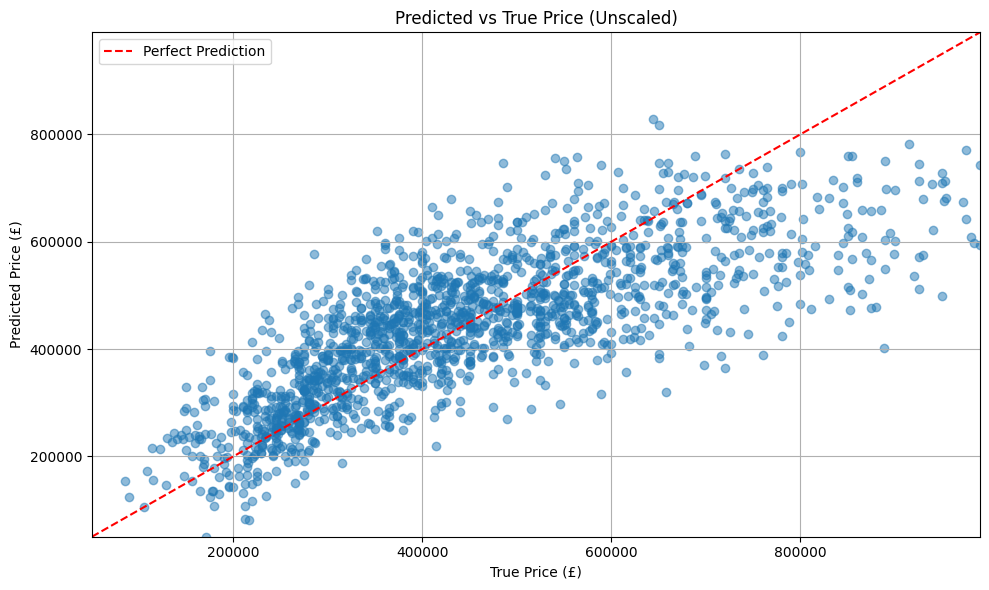

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel('True Price (£)')
plt.ylabel('Predicted Price (£)')
plt.title('Predicted vs True Price (Unscaled)')

min_val = min(y_true.min(), y_pred.min())
max_val = max(y_true.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', label='Perfect Prediction')

plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(rf, X_cv, y_cv, cv=5, scoring='neg_mean_squared_error')
print("Random Forest CV MSE (scaled):", -np.mean(rf_scores))

rf.fit(X_cv, y_cv)
y_pred_scaled = rf.predict(X_val_scaled)
y_pred_unscaled = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

rmse_rf = np.sqrt(mean_squared_error(y_val_actual, y_pred_unscaled))
print("Random Forest Validation RMSE (real-world):", rmse_rf)


Random Forest CV MSE (scaled): 0.007957190929561243
Random Forest Validation RMSE (real-world): 77403.36830346027
